In [3]:
import numpy as np
import pandas as pd

In [4]:
## Função para preparação do holdout (separando classes e dados) ##
def separation_features(dataframe):
    df_features = dataframe.iloc[:, :-1]
    df_classe = dataframe['classe']
    return df_features, df_classe;

## Lendo as bases: 
df1 = pd.read_csv('../Dados/CNN_Features/cnn_VGG16_256_max.csv')
df2 = pd.read_csv('../Dados/CNN_Features/cnn_VGG16_256_avg.csv')
df3 = pd.read_csv('../Dados/CNN_Features/cnn_VGG19_128_max.csv')
df4 = pd.read_csv('../Dados/CNN_Features/cnn_VGG19_256_max.csv')
df5 = pd.read_csv('../Dados/CNN_Features/cnn_VGG19_128_avg.csv')
df6 = pd.read_csv('../Dados/CNN_Features/cnn_VGG19_256_avg.csv')

df7 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG16_256_max.csv')
df8 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG16_256_avg.csv')
df9 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG19_128_max.csv')
df10 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG19_256_max.csv')
df11 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG19_128_avg.csv')
df12 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG19_256_avg.csv')


X1, y1 = separation_features(df1)
X2, y2 = separation_features(df2)
X3, y3 = separation_features(df3)
X4, y4 = separation_features(df4)
X5, y5 = separation_features(df5)
X6, y6 = separation_features(df6)
X7, y7 = separation_features(df7)
X8, y8 = separation_features(df8)
X9, y9 = separation_features(df9)
X10, y10 = separation_features(df10)
X11, y11 = separation_features(df11)
X12, y12 = separation_features(df12)


In [5]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,shuffle=True, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3,shuffle=True, random_state=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3,shuffle=True, random_state=1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3,shuffle=True, random_state=1)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3,shuffle=True, random_state=1)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3,shuffle=True, random_state=1)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.3,shuffle=True, random_state=1)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.3,shuffle=True, random_state=1)
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.3,shuffle=True, random_state=1)
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.3,shuffle=True, random_state=1)
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, test_size=0.3,shuffle=True, random_state=1)
X12_train, X12_test, y12_train, y12_test = train_test_split(X12, y12, test_size=0.3,shuffle=True, random_state=1)



In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def aplicar_DT_holdout(X_train, X_test, y_train, y_test, k_range = 12):
    for i in range(2, k_range + 1):
        dtc = DecisionTreeClassifier(criterion="entropy", max_depth=i)
        dtc.fit(X_train, y_train)
        y_pred = dtc.predict(X_test)

        acuracia = metrics.accuracy_score(y_test, y_pred)
        print(f'Accuracy: %.5f | k = {i}' % acuracia)

        confusion_matrix(y_test, y_pred)


def aplicar_DT_kfold(X, y, k_range = 12, k_fold = 10):
    kf = KFold(n_splits=k_fold, random_state=1, shuffle=True) #Criação do K-fold
    for i in range(2, k_range + 1):
        dtc = DecisionTreeClassifier(criterion="entropy", max_depth=i)

        scores = cross_val_score(dtc, X, y, scoring='accuracy', cv=kf)
        print(f'\nAccuracy (average): %.5f (%.5f) | k = {i}' % (scores.mean(), scores.std()))
        print(f'Accuracy (average): %.5f | k = {i} {scores}')

        y_pred = cross_val_predict(dtc, X, y, cv=kf)
        

In [7]:
datasets = [
    ('cnn_VGG16_256_max', X1_train, X1_test, y1_train, y1_test),
    ('cnn_VGG16_256_avg', X2_train, X2_test, y2_train, y2_test),
    ('cnn_VGG19_128_max', X3_train, X3_test, y3_train, y3_test),
    ('cnn_VGG19_256_max', X4_train, X4_test, y4_train, y4_test),
    ('cnn_VGG19_128_avg', X5_train, X5_test, y5_train, y5_test),
    ('cnn_VGG19_256_avg', X6_train, X6_test, y6_train, y6_test),
    ('PCA_cnn_VGG16_256_max', X7_train, X7_test, y7_train, y7_test),
    ('PCA_cnn_VGG16_256_avg', X8_train, X8_test, y8_train, y8_test),
    ('PCA_cnn_VGG19_128_max', X9_train, X9_test, y9_train, y9_test),
    ('PCA_cnn_VGG19_256_max', X10_train, X10_test, y10_train, y10_test),
    ('PCA_cnn_VGG19_128_avg', X11_train, X11_test, y11_train, y11_test),
    ('PCA_cnn_VGG19_256_avg', X12_train, X12_test, y12_train, y12_test),
]

In [8]:
for name, X_train, X_test, y_train, y_test in datasets:
    print(f"\n--------------------- {name} ---------------------")
    aplicar_DT_holdout(X_train, X_test, y_train, y_test)



--------------------- cnn_VGG16_256_max ---------------------
Accuracy: 0.81590 | k = 2
Accuracy: 0.86611 | k = 3
Accuracy: 0.88285 | k = 4
Accuracy: 0.85774 | k = 5
Accuracy: 0.87866 | k = 6
Accuracy: 0.86611 | k = 7
Accuracy: 0.87029 | k = 8
Accuracy: 0.89540 | k = 9
Accuracy: 0.89121 | k = 10
Accuracy: 0.89540 | k = 11
Accuracy: 0.86611 | k = 12

--------------------- cnn_VGG16_256_avg ---------------------
Accuracy: 0.92469 | k = 2
Accuracy: 0.94979 | k = 3
Accuracy: 0.95816 | k = 4
Accuracy: 0.92887 | k = 5
Accuracy: 0.92887 | k = 6
Accuracy: 0.92050 | k = 7
Accuracy: 0.92887 | k = 8
Accuracy: 0.93724 | k = 9
Accuracy: 0.93305 | k = 10
Accuracy: 0.92887 | k = 11
Accuracy: 0.94561 | k = 12

--------------------- cnn_VGG19_128_max ---------------------
Accuracy: 0.71130 | k = 2
Accuracy: 0.76569 | k = 3
Accuracy: 0.77406 | k = 4
Accuracy: 0.79498 | k = 5
Accuracy: 0.79916 | k = 6
Accuracy: 0.81172 | k = 7
Accuracy: 0.79498 | k = 8
Accuracy: 0.79079 | k = 9
Accuracy: 0.79079 | k = 1

In [10]:
datasets_kfold = [
    ('cnn_VGG16_256_max', X1, y1),
    ('cnn_VGG16_256_avg', X2, y2),
    ('cnn_VGG19_128_max', X3, y3),
    ('cnn_VGG19_256_max', X4, y4),
    ('cnn_VGG19_128_avg', X5, y5),
    ('cnn_VGG19_256_avg', X6, y6),
    ('PCA_cnn_VGG16_256_max', X7, y7),
    ('PCA_cnn_VGG16_256_avg', X8, y8),
    ('PCA_cnn_VGG19_128_max', X9, y9),
    ('PCA_cnn_VGG19_256_max', X10, y10),
    ('PCA_cnn_VGG19_128_avg', X11, y11),
    ('PCA_cnn_VGG19_256_avg', X12, y12),
]

In [12]:
for name, X, y in datasets_kfold:
    print(f"\n--------------------- {name} (K-Fold) ---------------------")
    aplicar_DT_kfold(X, y)


--------------------- cnn_VGG16_256_max (K-Fold) ---------------------

Accuracy (average): 0.84911 (0.04363) | k = 2
Accuracy (average): %.5f | k = 2 [0.8125     0.775      0.8375     0.925      0.85       0.84810127
 0.79746835 0.87341772 0.89873418 0.87341772]

Accuracy (average): 0.89062 (0.03107) | k = 3
Accuracy (average): %.5f | k = 3 [0.875      0.85       0.8375     0.925      0.925      0.89873418
 0.86075949 0.92405063 0.91139241 0.89873418]

Accuracy (average): 0.91073 (0.03104) | k = 4
Accuracy (average): %.5f | k = 4 [0.8875     0.9125     0.875      0.925      0.925      0.93670886
 0.84810127 0.91139241 0.96202532 0.92405063]

Accuracy (average): 0.91203 (0.02545) | k = 5
Accuracy (average): %.5f | k = 5 [0.8875     0.8875     0.8625     0.925      0.9375     0.92405063
 0.89873418 0.92405063 0.94936709 0.92405063]

Accuracy (average): 0.90187 (0.02572) | k = 6
Accuracy (average): %.5f | k = 6 [0.9        0.9        0.8625     0.925      0.9375     0.91139241
 0.848101

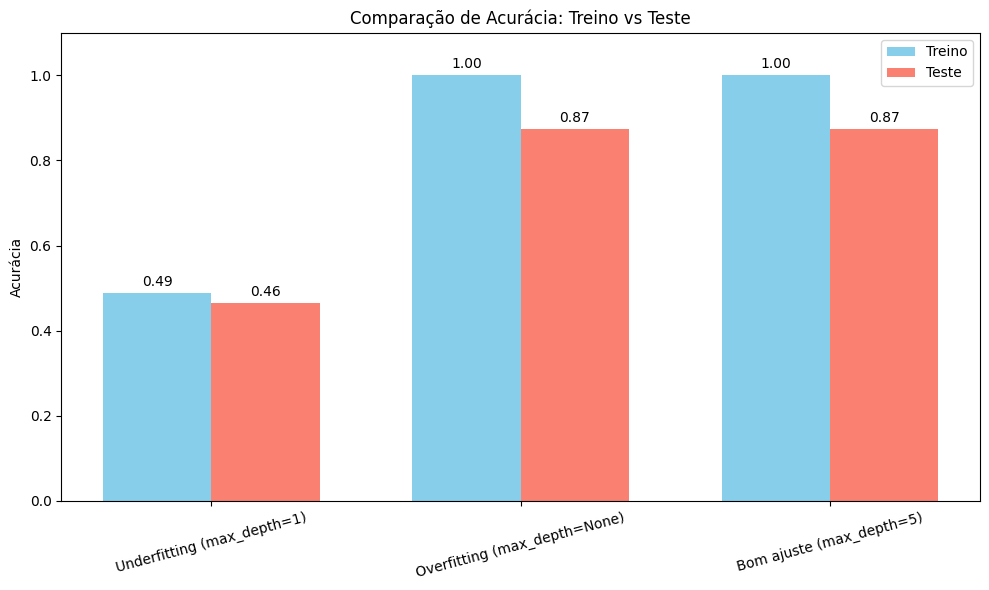

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Configurações para três modelos:
models = {
    'Underfitting (max_depth=1)': DecisionTreeClassifier(max_depth=1, random_state=42),
    'Overfitting (max_depth=None)': DecisionTreeClassifier(max_depth=None, random_state=42),
    'Bom ajuste (max_depth=5)': DecisionTreeClassifier(max_depth=8, random_state=42)
}

# Guardar resultados
results = {}

for name, model in models.items():
    model.fit(X1_train, y1_train)
    
    train_acc = accuracy_score(y1_train, model.predict(X1_train))
    test_acc = accuracy_score(y1_test, model.predict(X1_test))
    
    results[name] = (train_acc, test_acc)

# Plotando os resultados
labels = list(results.keys())
train_scores = [results[label][0] for label in labels]
test_scores = [results[label][1] for label in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_scores, width, label='Treino', color='skyblue')
bars2 = ax.bar(x + width/2, test_scores, width, label='Teste', color='salmon')

ax.set_ylabel('Acurácia')
ax.set_title('Comparação de Acurácia: Treino vs Teste')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15)
ax.set_ylim(0, 1.1)
ax.legend()

# Mostrar valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()
